# Logistic Regression with Python

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Churn = pd.read_csv('Churn_Modelling.csv')
df = Churn.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning

<AxesSubplot:>

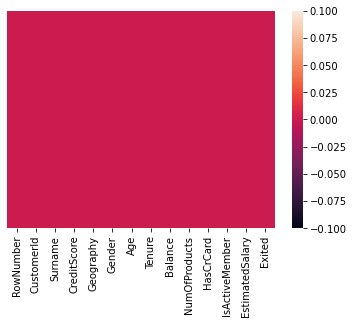

In [3]:
#Checking null values if any
sns.heatmap(df.isnull(),yticklabels=False,cbar = True)

In [4]:
#selecting data which is required
df = df.iloc[:,3:]  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Feature Engineering

#### Min Max Scaling

In [6]:
def MinMaxScaler(df):
    df = (df - df.min())/(df.max()-df.min())
    return df

In [7]:
to_scale = ['Balance','EstimatedSalary','CreditScore']
for col in to_scale:
    df[col] = MinMaxScaler(df[col])

#### One hot encoding

In [8]:
Geo = pd.get_dummies(df['Geography'],drop_first=True)
Male = pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
df.drop(['Gender','Geography'],axis = 1,inplace = True)

In [10]:
df = pd.concat([df,Geo,Male],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,1,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,1,0


In [11]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [12]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

### Kfolds

Confusion Matrix :-
 [[1428  552]
 [ 161  359]] 

Classification Matrix :-                precision    recall  f1-score   support

           0       0.90      0.72      0.80      1980
           1       0.39      0.69      0.50       520

    accuracy                           0.71      2500
   macro avg       0.65      0.71      0.65      2500
weighted avg       0.79      0.71      0.74      2500
 

ROC score :-  0.7057983682983683 

--------------------------------------------------------------------------------
Confusion Matrix :-
 [[1387  607]
 [ 150  356]] 

Classification Matrix :-                precision    recall  f1-score   support

           0       0.90      0.70      0.79      1994
           1       0.37      0.70      0.48       506

    accuracy                           0.70      2500
   macro avg       0.64      0.70      0.64      2500
weighted avg       0.79      0.70      0.72      2500
 

ROC score :-  0.6995720362669035 

---------------------------------------

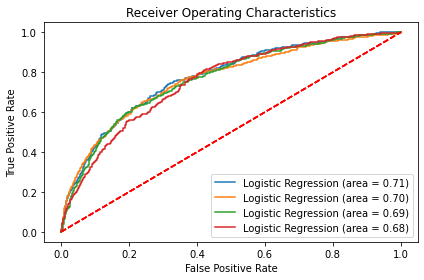

In [14]:
def crossvalidation_log(folds,df):    
    kfold = KFold(folds,shuffle=True,random_state=1)
    for train, test in kfold.split(df):
        #print(train,test)
        X_train = X.iloc[train]
        X_test = X.iloc[test]
        y_train = y.iloc[train]
        y_test = y.iloc[test]
        logmodel = LogisticRegression(solver='liblinear')
        logmodel.fit(X_train,y_train)
        y_pred = logmodel.predict(X_test)
        logical = logmodel.predict_proba(X_test)[:,1]>0.2
        y_pred = [0]*np.size(logical)
        for i in np.arange(0,np.size(logical)):
            if logical[i]== True:
                y_pred[i]=1
        print('Confusion Matrix :-\n',confusion_matrix(y_test,y_pred),'\n')
        print('Classification Matrix :- ',classification_report(y_test,y_pred),'\n')
        print('ROC score :- ',roc_auc_score(y_test,y_pred),'\n')
        logit_roc_auc = roc_auc_score(y_test, y_pred)
        fpr,tpr, threshold = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
        plt.grid()
        plt.plot(fpr,tpr,label = 'Logistic Regression (area = %0.2f)'% logit_roc_auc)
        plt.plot([0,1],[0,1],'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristics')
        plt.legend(loc=0)
        plt.tight_layout()
        print('-'*80)


crossvalidation_log(4,df)